<a href="https://colab.research.google.com/github/filipecareli/Bootcamp-Alura-Data-Science/blob/main/Filipe_Careli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

*   Foi analisada a base dos casos de COVID-19 baixadas do projeto BRASIL.IO.
*   Primeiro analisou-se os valores acumulados por estado, procurando discrepâncias nos rankings do número de casos e o número de mortes.
*   Após esta análise, destacou-se a diferença na letalidade de Rio de Janeiro e Santa Catarina. O que podemos ver nos dados que evidência essa diferença de comportamento?
*   Pode-se observar que: a curva de contágio de Santa Catarina é mais achatada que a do Rio de Janeiro;
*   Os dados do Rio de Janeiro apresentam indícios de subnotificação de casos.




## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

###Análise do conteúdo do Data Frame

In [ ]:
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import seaborn as sns

pd.options.display.float_format = "{:.2f}".format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#os dados trabalhados serão os do COVID-19, do Brasil.IO
dados = pd.read_csv("/content/drive/MyDrive/Bootcamp/caso.csv")

dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [ ]:
# verificar o número de linhas e colunas
dados.shape

(936870, 13)

In [ ]:
# linhas que tiverem menos de 936870 não nulos, possuem dados faltantes ou sem informação.
# é possível avaliar o tipo de variável de cada informação (inteiro, booleano, pt flutuante, etc.)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            936870 non-null  object 
 1   state                           936870 non-null  object 
 2   city                            930535 non-null  object 
 3   place_type                      936870 non-null  object 
 4   confirmed                       936870 non-null  int64  
 5   deaths                          936870 non-null  int64  
 6   order_for_place                 936870 non-null  int64  
 7   is_last                         936870 non-null  bool   
 8   estimated_population_2019       933215 non-null  float64
 9   estimated_population            933215 non-null  float64
 10  city_ibge_code                  933215 non-null  float64
 11  confirmed_per_100k_inhabitants  919888 non-null  float64
 12  death_rate      

In [ ]:
# avaliando quais e onde são os dados faltantes
dados.isnull().sum(axis=0)

date                                  0
state                                 0
city                               6335
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3655
estimated_population               3655
city_ibge_code                     3655
confirmed_per_100k_inhabitants    16982
death_rate                            0
dtype: int64

In [ ]:
#Os valores NaN nas colunas estimated_pop... e city_ibge_code aparecem como Importados/Indefinidos em city
dados.query('city_ibge_code == "NaN"').city.value_counts()

Importados/Indefinidos    3655
Name: city, dtype: int64

In [ ]:
# verificando quantos estados aparecem nos dados(aparecem todos os estados?)
dados['state'].nunique()

27

In [ ]:
dados['state'].unique()

array(['AC', 'AP', 'AM', 'AL', 'DF', 'CE', 'ES', 'BA', 'MS', 'MA', 'GO',
       'MT', 'PA', 'PB', 'PE', 'PI', 'MG', 'RO', 'RJ', 'RN', 'PR', 'RR',
       'SE', 'SC', 'RS', 'TO', 'SP'], dtype=object)

In [ ]:
# quantas cidades aparecem nos dados
dados['city'].nunique()

5295

In [ ]:
# outros valores faltantes nas cidades são dados contablizando por estado
dados['place_type'].unique()

array(['state', 'city'], dtype=object)

###Preparando os dados

In [ ]:
# transformando a data de string em datetime
data = pd.to_datetime(dados['date'], errors='coerce', format='%Y/%m/%d')
data
dados['date'] = data
type(dados['date'][0])

dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.00,894470.00,12.00,3493.47,0.02,Norte
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.00,894470.00,12.00,3490.11,0.02,Norte
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.00,894470.00,12.00,3461.49,0.02,Norte
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.00,894470.00,12.00,3460.60,0.02,Norte
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.00,894470.00,12.00,3460.26,0.02,Norte


In [ ]:
# acrescentar a região utilizando um dicionário
dados['region'] = dados['state']

regiao = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AM': 'Norte',
    'AP': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro Oeste',
    'MA': 'Nordeste',
    'MG': 'Sudeste',
    'MS': 'Centro Oeste',
    'MT': 'Centro Oeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'PR': 'Sul',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RO': 'Norte',
    'RR': 'Norte',
    'RS': 'Sul',
    'SC': 'Sul',
    'SE': 'Nordeste',
    'SP': 'Sudeste',
    'TO': 'Norte'
    }

dados['region'].replace(regiao, inplace=True)
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.00,894470.00,12.00,3493.47,0.02,Norte
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.00,894470.00,12.00,3490.11,0.02,Norte
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.00,894470.00,12.00,3461.49,0.02,Norte
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.00,894470.00,12.00,3460.60,0.02,Norte
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.00,894470.00,12.00,3460.26,0.02,Norte


In [ ]:
# criando um df  com os dados por estado
dados_estado = dados[dados["place_type"] == "state"].copy()
dados_estado.drop("city", axis=1, inplace=True)

dados_estado.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
0,2020-11-05,AC,state,31248,697,234,True,881935.00,894470.00,12.00,3493.47,0.02,Norte
1,2020-11-04,AC,state,31218,696,233,False,881935.00,894470.00,12.00,3490.11,0.02,Norte
2,2020-11-03,AC,state,30962,695,232,False,881935.00,894470.00,12.00,3461.49,0.02,Norte
3,2020-11-02,AC,state,30954,693,231,False,881935.00,894470.00,12.00,3460.60,0.02,Norte
4,2020-11-01,AC,state,30951,693,230,False,881935.00,894470.00,12.00,3460.26,0.02,Norte


In [ ]:
#separando os acumulados por estado
acumulado = dados_estado[dados_estado['is_last'] == True].reset_index()
acumulado.sort_values(by = 'confirmed', ascending = True, 
                                   inplace = True)

acumulado.head()

,index,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
0,0,2020-11-05,AC,state,31248,697,234,True,881935.00,894470.00,12.00,3493.47,0.02,Norte
1,4247,2020-11-03,AP,state,52832,751,228,True,845731.00,861773.00,16.00,6130.62,0.01,Norte
21,651937,2020-11-04,RR,state,58304,695,226,True,605761.00,631181.00,14.00,9237.29,0.01,Norte
17,539186,2020-11-05,RO,state,72630,1470,222,True,1777225.00,1796460.00,11.00,4042.95,0.02,Norte
25,802533,2020-11-04,TO,state,76175,1108,228,True,1572866.00,1590248.00,17.00,4790.13,0.01,Norte


In [ ]:
#acumulado de casos confirmados
corte1 = ['state','confirmed']

acumulado_casos = acumulado[corte1]
acumulado_casos = acumulado_casos.sort_values('confirmed', ascending= False)
acumulado_casos.head(2)

,state,confirmed
26,SP,1125936
16,MG,364541


In [ ]:
#acumulado de casos confirmados
corte2 = ['state','deaths']

acumulado_mortes = acumulado[corte2]
acumulado_mortes = acumulado_mortes.sort_values('deaths', ascending= False)
acumulado_mortes.head(2)

,state,deaths
26,SP,39717
18,RJ,20849


In [ ]:
#acumulado de casos confirmados
corte3 = ['state','confirmed_per_100k_inhabitants']

acumulado_cemk = acumulado[corte3]
acumulado_cemk = acumulado_cemk.sort_values('confirmed_per_100k_inhabitants', ascending= False)
acumulado_cemk.head(2)

,state,confirmed_per_100k_inhabitants
21,RR,9237.29
4,DF,7035.83


In [ ]:
# separando dados por região
dados_regioes = dados[['region', 'date', 'deaths']].groupby(by=['region','date']).sum()
dados_regioes.reset_index(inplace=True)

dados_regioes.head()

,region,date,deaths
0,Centro Oeste,2020-03-07,0
1,Centro Oeste,2020-03-08,0
2,Centro Oeste,2020-03-09,0
3,Centro Oeste,2020-03-10,0
4,Centro Oeste,2020-03-11,0


In [ ]:
# criando um df para o estado do Rio de Janeiro
dados_rio = dados[dados["state"] == "RJ"].copy()
dados_rio = dados_rio[dados_rio["place_type"] == "state"].copy()
dados_rio.drop("city", axis=1, inplace=True)

dados_rio.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
548128,2020-11-05,RJ,state,313843,20849,236,True,17264943.00,17366189.00,33.00,1807.21,0.07,Sudeste
548129,2020-11-04,RJ,state,313089,20759,235,False,17264943.00,17366189.00,33.00,1802.87,0.07,Sudeste
548130,2020-11-03,RJ,state,313089,20651,234,False,17264943.00,17366189.00,33.00,1802.87,0.07,Sudeste
548131,2020-11-02,RJ,state,311308,20636,233,False,17264943.00,17366189.00,33.00,1792.61,0.07,Sudeste
548132,2020-11-01,RJ,state,311014,20611,232,False,17264943.00,17366189.00,33.00,1790.92,0.07,Sudeste


In [ ]:
corte4 = ['date','confirmed','deaths','death_rate','confirmed_per_100k_inhabitants']

casos_rio = dados_rio[corte4]
casos_rio = casos_rio.sort_values('date')
casos_rio.head()

,date,confirmed,deaths,death_rate,confirmed_per_100k_inhabitants
548363,2020-03-05,1,0,0.00,0.01
548362,2020-03-06,2,0,0.00,0.01
548361,2020-03-08,3,0,0.00,0.02
548360,2020-03-12,15,0,0.00,0.09
548359,2020-03-15,24,0,0.00,0.14


In [ ]:
# criando um df para o estado de Santa Catarina
dados_sc = dados[dados["state"] == "SC"].copy()
dados_sc = dados_sc[dados_sc["place_type"] == "state"].copy()
dados_sc.drop("city", axis=1, inplace=True)

dados_sc.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
668623,2020-11-05,SC,state,268644,3173,239,True,7164788.00,7252502.00,42.00,3704.16,0.01,Sul
668624,2020-11-04,SC,state,266637,3163,238,False,7164788.00,7252502.00,42.00,3676.48,0.01,Sul
668625,2020-11-03,SC,state,263823,3139,237,False,7164788.00,7252502.00,42.00,3637.68,0.01,Sul
668626,2020-11-02,SC,state,261543,3129,236,False,7164788.00,7252502.00,42.00,3606.25,0.01,Sul
668627,2020-11-01,SC,state,260057,3122,235,False,7164788.00,7252502.00,42.00,3585.76,0.01,Sul


In [ ]:
corte4 = ['date','confirmed','deaths','death_rate','confirmed_per_100k_inhabitants']

casos_sc = dados_sc[corte4]
casos_sc = casos_sc.sort_values('date')
casos_sc.head()

,date,confirmed,deaths,death_rate,confirmed_per_100k_inhabitants
668861,2020-03-12,2,0,0.00,0.03
668860,2020-03-13,3,0,0.00,0.04
668859,2020-03-14,5,0,0.00,0.07
668858,2020-03-15,6,0,0.00,0.08
668857,2020-03-16,7,0,0.00,0.10


###Análise dos dados

Fazendo uma análise inicial dos dados acumulados, é possível perceber que os estados não seguem a mesma ordem para o acumulado de casos e de mortes. Destaque para o Rio de Janeiro que está em segundo no número de mortes, mesmo sendo o quarto em número de casos. Outro estados com posições discrepantes é Santa Catarina, que é o sexto em número de casos, mas é o décimo sexto em mortes. 


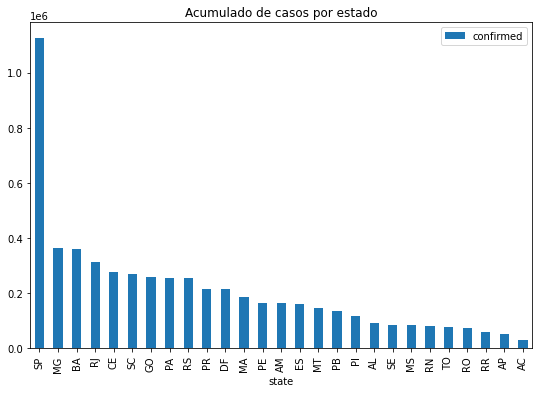

In [ ]:
ax = acumulado_casos.plot(x="state",kind="bar", figsize=(9,6))

plt.title("Acumulado de casos por estado")
plt.show()

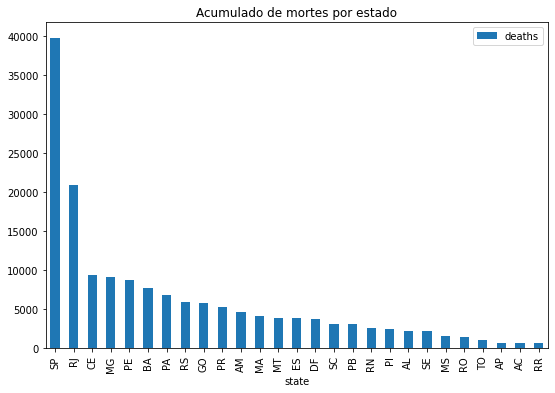

In [ ]:
ax = acumulado_mortes.plot(x="state",kind="bar", figsize=(9,6))

plt.title("Acumulado de mortes por estado")
plt.show()

Essa  análise poderia ser feita pela coluna *'death_rate*', mas a intenção foi fazer de forma visual.


In [ ]:
#Santa Catarina com a menor letalidade
acumulado.sort_values(by = 'death_rate')

acumulado.head(1)

,index,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
23,668623,2020-11-05,SC,state,268644,3173,239,True,7164788.00,7252502.00,42.00,3704.16,0.01,Sul


In [ ]:
#Rio de Janeiro com a maior letalidade
acumulado.tail(1)

,index,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
18,548128,2020-11-05,RJ,state,313843,20849,236,True,17264943.00,17366189.00,33.00,1807.21,0.07,Sudeste


De fato, pesquisando há reportagens sobre a alta taxa de letalidade no estado do Rio de Janeiro: "*Na comparação com os estados... observa-se que a letalidade no município do Rio está bem acima da média nacional...No Estado do Rio de Janeiro, a taxa alta é puxada não apenas pelo município do Rio, mas também por outras cidades fluminenses ... Ela pode ser fruto da soma dos dois fatores: a subnotificação, junto com a precarização do atendimento à saúde na esfera pública*" (https://pfarma.com.br/coronavirus/5861-letalidade-covid19-rio-de-janeiro.html)

Também se encontrou reportagem sobre a baixa letalidade de Santa Catarina: " *o estado apresenta trajetória de queda no número diário de mortes decorrentes da doença ... A taxa de letalidade catarinense, é a menor do Brasil e está abaixo da maioria dos países desenvolvidos ... atribui os números positivos de Santa Catarina na comparação com outros estados e países às medidas adotadas no início da pandemia, que permitiram adiar o pico da curva de contágio a tempo do fortalecimento da estrutura hospitalar.*" (https://ocp.news/geral/sc-tem-a-menor-taxa-de-letalidade-por-coronavirus-no-brasil-afirma-governo-do-estado)

O que Rio de Janeiro e Santa Catarina tem de tão diferente? Muitas coisas poderiam ser avaliadas (clima, número de hospitais/leitos por habitante, faixa etária da população, por exemplo), porém o que conseguimos visualizar com os dados que temos nesse conjunto? O Rio de Janeiro tem uma população muito maior (17,3 milhões de habitantes contra 7,2 milhões em Santa Catarina, segundo a coluna "*estimated_population*") em um estado menor, ou seja, em uma avaliação superficial possui uma maior densidade demográfica no estado.

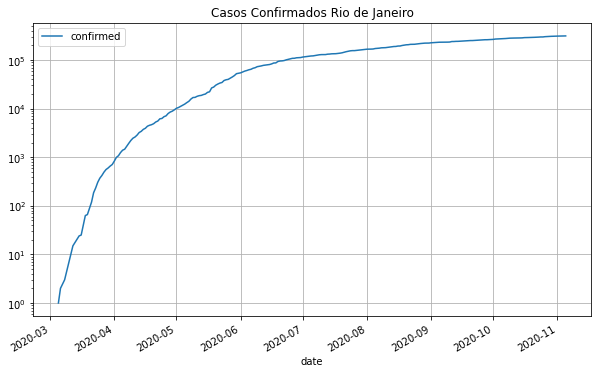

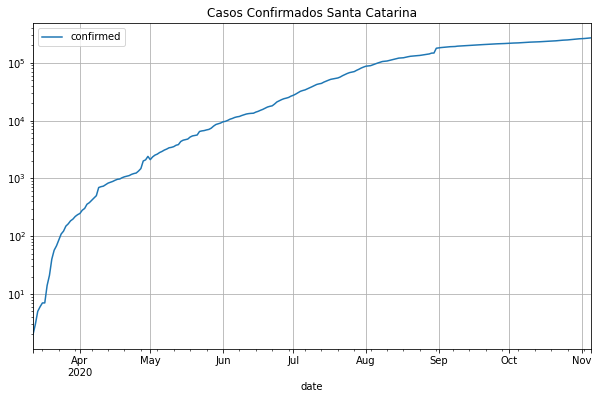

In [ ]:
# curva de crescimento dos casos no Rio de Janeiro
# o crescimento do número de casos é aproximadamente exponencial, optou-se pela escala logarítmica.

casos_rio.plot(x="date",y="confirmed",figsize=(10,6),logy=True, grid=True)
plt.title("Casos Confirmados Rio de Janeiro")
casos_sc.plot(x="date",y="confirmed",figsize=(10,6),logy=True,grid=True)
plt.title("Casos Confirmados Santa Catarina")
plt.show()

Pode-se observar, comparando a evolução dos dois estados, que a curva de casos em Santa Catarina está mais achatada ("flattening the curve"). Este dado vem de encontro ao que os órgão de saúde orientam. 

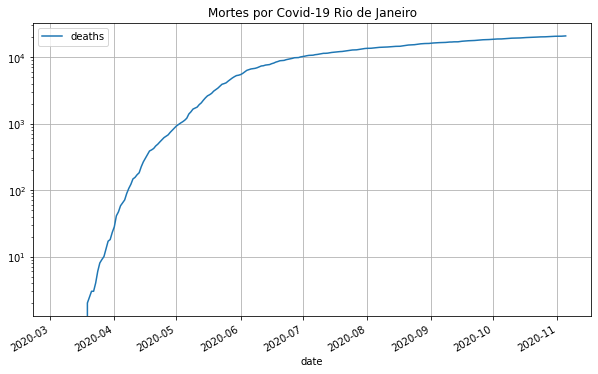

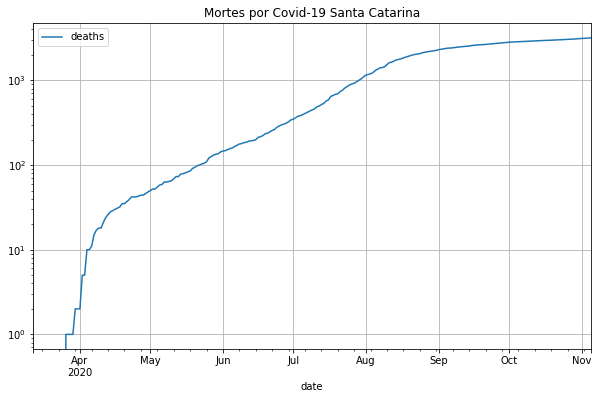

In [ ]:
casos_rio.plot(x="date",y="deaths",figsize=(10,6),logy=True,grid=True)
plt.title("Mortes por Covid-19 Rio de Janeiro")
casos_sc.plot(x="date",y="deaths",figsize=(10,6),logy=True,grid=True)
plt.title("Mortes por Covid-19 Santa Catarina")
plt.show()

Porém, podemos fazer contrapontos as análises apresentadas (afinal, só é possível analisar com os dados o que "está nos dados"). Muitas vezes precisamos buscar outras fontes para contrapor as nossas observações. Por exemplo, podemos confiar cegamente nos dados do Rio de Janeiro? ("Segundo os pesquisadores da Uerj e UFRJ, o alto índice da relação número de mortes e casos confirmados no estado pode ser explicado pela baixa quantidade de testes realizados e uma grande subnotificação de casos." Fonte:https://g1.globo.com/rj/rio-de-janeiro/noticia/2020/06/30/rj-tem-a-maior-taxa-de-letalidade-da-covid-19-no-pais-diz-estudo.ghtml). Por outro lado, o estado de Santa Catarina vem apresentando grande aumento no número de casos (por enquanto, sem um aumento expressivo da letalidade).

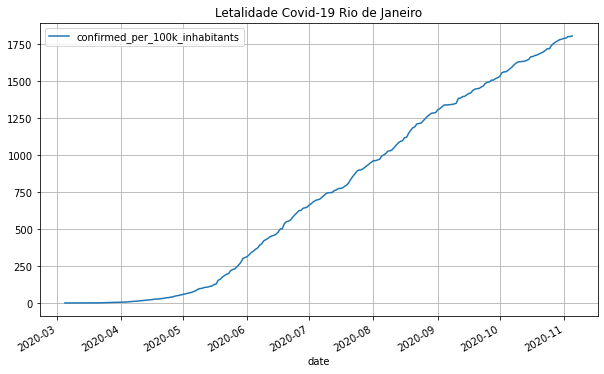

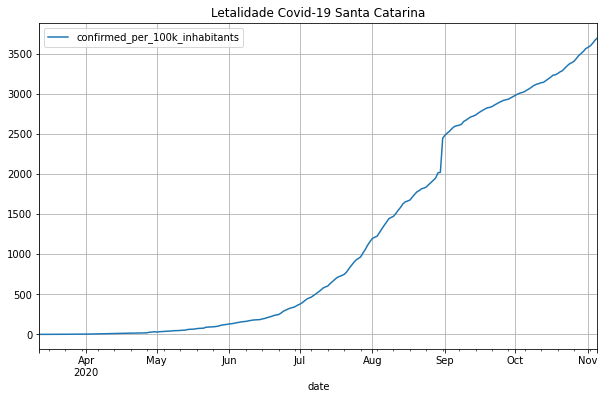

In [ ]:
casos_rio.plot(x="date",y="confirmed_per_100k_inhabitants",figsize=(10,6),grid=True)
plt.title("Letalidade Covid-19 Rio de Janeiro")
casos_sc.plot(x="date",y="confirmed_per_100k_inhabitants",figsize=(10,6),grid=True)
plt.title("Letalidade Covid-19 Santa Catarina")
plt.show()

Duas coisas podem ser vistas nesse gráfico: uma é que aparentemente o Rio tem um menor número de casos por habitantes (vamos comparar com os outros estados mais a baixo) e a outra é a mudança de comportamento dos dados de Santa Catarina no mês de setembro.

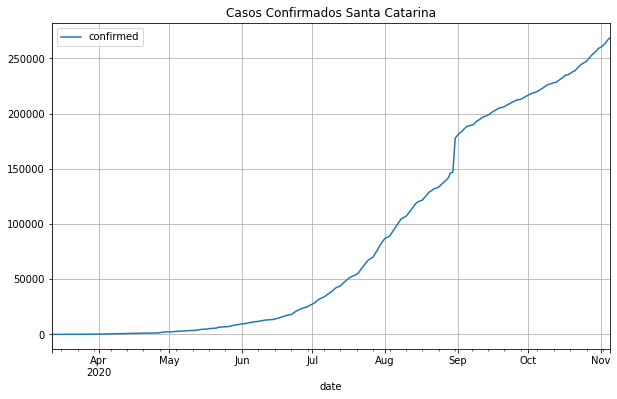

In [ ]:
casos_sc.plot(x="date",y="confirmed",figsize=(10,6),grid=True)
plt.title("Casos Confirmados Santa Catarina")
plt.show()

Pesquisando, realmente há um período em setembro com grande entrada de casos em Santa Catarina.  O mais provável é que seja um registro de casos acumulados. Este comportamento também pode ser visto no gráfico acima. Porém, aparentemente ele não invalida as análises feitas até o momento.

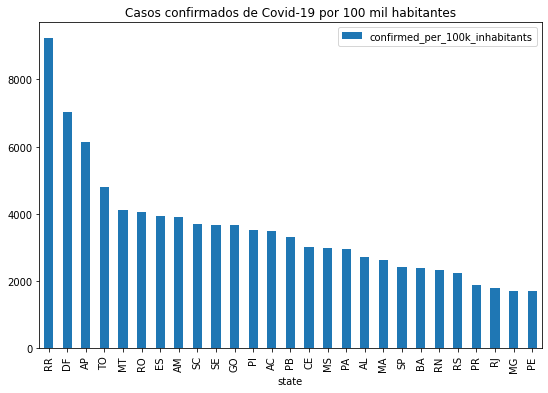

In [ ]:
ax = acumulado_cemk.plot(x="state",kind="bar", figsize=(9,6))

plt.title("Casos confirmados de Covid-19 por 100 mil habitantes")
plt.show()

O Rio de Janeiro está entre os estados com menor número de casos por cem mil habitantes nos dados oficiais. Isso pode ser uma evidência de que há subnotificação, contrapondo este dado com a taxa de letalidade e o fato de que não é esperado um comportamento diferente de transmissão do vírus.

Concluímos, então, que se os dados apresentados e analisados forem confiáveis, o trabalho visando o achatamento da curva executado no começo da pandemia pelo estado de Santa Catarina (isolamento social, grande porcentagem de testes e investimentos hospitalar, segundo reportagens) parece ter surtido efeito, mantendo baixa a sua taxa de letalidade.